In [30]:
import numpy as np
import time
import random
from scipy import sparse
import random
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import linalg as lg

Simple function to load gene data.

In [4]:
def prep_data():
    x = np.loadtxt("simulated_genos", delimiter=" ", dtype="float32")
    y = np.array([[1] * 10000 + [0] * 10000], dtype="float32")
    y_c = y - 0.5
    return x, y, y_c

# Permutation Test

In [5]:
x, y, y_c = prep_data()

See $Y_{Centred}$

In [6]:
y_c

array([[ 0.5,  0.5,  0.5, ..., -0.5, -0.5, -0.5]], dtype=float32)

Calculate $GG^T$

In [10]:
%%time 
xxt = np.dot(x, x.T)

Wall time: 6.98 s


See $GG^T$

In [9]:
xxt[1:100, 1:100]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Convert $ GG^T$ to a sparse matrix

In [15]:
%%time
xxt_sparse = sparse.csr_matrix(xxt)
print('covert to sparse time: ')

covert to sparse time: 
Wall time: 5.3 s


Using scipy.sparse to calculate $Q$

In [20]:
%%time
q00 = y_c @ xxt_sparse
q11 = (y_c * q00).sum(axis=1)
print("Value of Q:",q11)
print('sparse computation time: ')

Value of Q: [223.25]
sparse computation time: 
Wall time: 2 ms


## Original Numpy Permutation

Noitce: this might be very time consuming! Please ignore it if you do not care about it.

In [26]:
%%time
for i in range(1000):
    y_cc = np.zeros((20000, 1)) - 0.5
    y_cc[np.random.choice(20000, size = 10000, replace = False)] = 0.5
    q0 = y_cc.T.dot(xxt)
    q2 = (q0 * y_cc.T).sum(axis=1)
print('Numpy 1000 permutation computation time: ')

KeyboardInterrupt: 

## Standard Scipy.sparse Permutation

Use the standard scipy.sparse module to do permutation. Can still be improved!

In [70]:
%%time
m = 1000
q = np.empty((m, 1))

for i in range(m):
    y_cc = np.zeros((20000, 1)) - 0.5
    y_cc[np.random.choice(20000, size = 10000, replace = False)] = 0.5
    q[i,0] = y_cc.T @ xxt_sparse @ y_cc
print('Scipy.sparse 1000 permutation computation time: ')

Scipy.sparse 1000 permutation computation time: 
Wall time: 1.04 s


In [67]:
print("Mean:", np.average(q))

Mean: 236.147


(array([  5.,  20.,  32.,  39.,  66.,  74.,  76.,  88., 104.,  97.,  84.,
         64.,  59.,  51.,  45.,  23.,  20.,  17.,  17.,   5.,   6.,   2.,
          1.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([116.25, 129.25, 142.25, 155.25, 168.25, 181.25, 194.25, 207.25,
        220.25, 233.25, 246.25, 259.25, 272.25, 285.25, 298.25, 311.25,
        324.25, 337.25, 350.25, 363.25, 376.25, 389.25, 402.25, 415.25,
        428.25, 441.25, 454.25, 467.25, 480.25, 493.25, 506.25]),
 <a list of 30 Patch objects>)

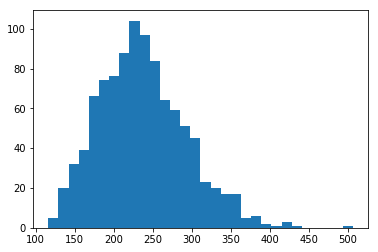

In [71]:
plt.hist(q, bins=30)